In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def carga_csv(file_name):
    """carga el fichero csv especificado y lo
 devuelve en un array de numpy
    """
    valores = pd.read_csv(file_name, header=None).values
    # suponemos que siempre trabajaremos con float
    return valores.astype(float)

In [3]:
datos = carga_csv('ex1data2.csv')

In [4]:
def normalize(X):
    '''Normaliza los datos de la matriz X
    restandoles su media y dividiendolos por la desviacion estandar'''
    mu = np.mean(X, axis=0)
    X_mean = X - mu
    sigma = np.std(X, axis=0)
    X_norm = X_mean / sigma
    return X_norm, mu, sigma

In [5]:
X = datos[:, :-1]
np.shape(X)         # (47, 2)

Y = datos[:, -1]
np.shape(Y)         # (47,)
m = np.shape(X)[0]
n = np.shape(X)[1]

# añadimos una columna de 1's a la X
X = np.hstack([np.ones([m, 1]), X])

In [6]:
datos_norm, mu, sigma = normalize(datos)

X_norm = datos_norm[:, :-1]
np.shape(X_norm)         # (47, 2)

Y_norm = datos_norm[:, -1]
np.shape(Y_norm)         # (47,)
m = np.shape(X_norm)[0]
n = np.shape(X_norm)[1]

# añadimos una columna de 1's a la X
X_norm = np.hstack([np.ones([m, 1]), X_norm])

In [7]:
def coste(X, Y, Theta):
    H = np.dot(X, Theta)
    Aux = (H - Y)
    return np.dot(Aux.T, Aux) / (2 * len(X))

def descenso_gradiente(X, Y, Theta, alpha):
    NuevaTheta = Theta
    m = np.shape(X)[0]
    n = np.shape(X)[1]
    H = np.dot(X, Theta)
    Aux = (H - Y)
    for i in range(n):
        Aux_i = Aux * X[:, i]
        NuevaTheta[i] -= (alpha / m) * Aux_i.sum()
    return NuevaTheta, coste(X, Y, NuevaTheta)

In [8]:
Theta = np.zeros(np.shape(X_norm)[1])
alpha = 0.01

for i in range(1500):
    Theta, cost = descenso_gradiente(X_norm, Y_norm, Theta, alpha)
    
print(cost)
print(Theta)

0.13352766477132919
[-7.21408748e-17  8.84137547e-01 -5.25503786e-02]


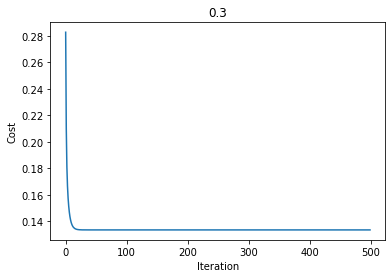

Final cost: 0.13352749098554287
Final Theta: [-9.21248893e-17  8.84765988e-01 -5.31788197e-02]


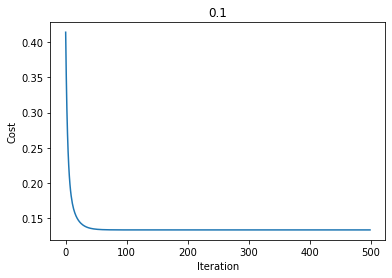

Final cost: 0.13352749098554287
Final Theta: [-6.99794832e-17  8.84765988e-01 -5.31788196e-02]


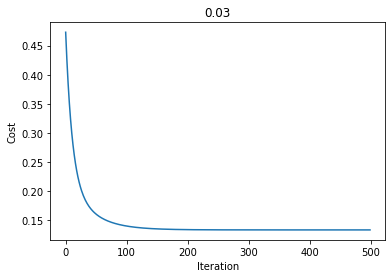

Final cost: 0.13352765485100754
Final Theta: [-7.23003218e-17  8.84155747e-01 -5.25685789e-02]


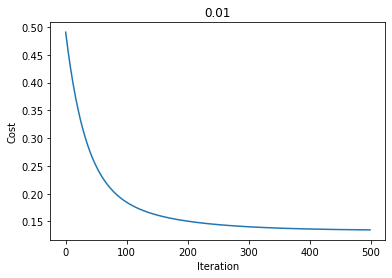

Final cost: 0.13470384837630953
Final Theta: [-9.4929974e-17  8.3290228e-01 -1.6355787e-03]


In [9]:
for alpha in [0.3, 0.1, 0.03, 0.01]:
    Theta = np.zeros(np.shape(X_norm)[1])
    costes = []
    plt.figure()
    plt.title(alpha)
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    ax = plt.gca()
    for i in range(500):
        Theta, cost = descenso_gradiente(X_norm, Y_norm, Theta, alpha)
        costes.append(cost)
    
    plt.plot(costes)
    plt.show()
    print('Final cost:', cost)
    print('Final Theta:', Theta)

In [10]:
def normal_equation(X, Y):
    Aux1 = np.matmul(X.T, X)
    I = np.linalg.inv(Aux1)
    Aux2 = np.matmul(I, X.T)
    return np.matmul(Aux2, Y)

In [11]:
Theta1 = np.zeros(np.shape(X_norm)[1])
alpha = 0.01

for i in range(100000):
    Theta1, cost = descenso_gradiente(X_norm, Y_norm, Theta1, alpha)
    
print(cost)
print(Theta1)

0.13352749098554287
[-7.68297955e-17  8.84765988e-01 -5.31788197e-02]


In [12]:
Theta2 = normal_equation(X, Y)
print(coste(X, Y, Theta2))
print(Theta2)

2043280050.602828
[89597.9095428    139.21067402 -8738.01911233]


In [25]:
## Datos para probar ambos modelos
casa = np.array([1650,3])

# Datos normalizados para modelo de descenso del gradiente
casa_norm = (casa - mu[:-1])
casa_norm = casa_norm / sigma[:-1]

# Probamos el descenso del gradiente y desnormalizamos el resultado
gradient_predict = np.matmul(np.append(np.array([1]),casa_norm), Theta1) * sigma[-1]
gradient_predict = gradient_predict + mu[-1]

# Probamos la ecuación normal
normal_predict = np.matmul(np.append(np.array([1]),casa), Theta2)

print(gradient_predict)
print(normal_predict)

293081.4643348965
293081.46433489426
